# Goals
- low pass filter를 사용하여 blur image를 생성
- 2D convolution을 이해하고, 이를 이용하여 low pass filter를 구현

# 2D Convolution(Image Filtering)
- 1차원 신호처럼 2차원 이미지에도 convolution을 적용할 수 있다. 
- low pass filter, high-pass filter를 사용
- LPF는 노이즈를 제거하고, blur image를 생성. HPF는 이미지의 edge를 찾는데 사용
- cv.filter2D 함수를 사용하여 2D convolution을 적용

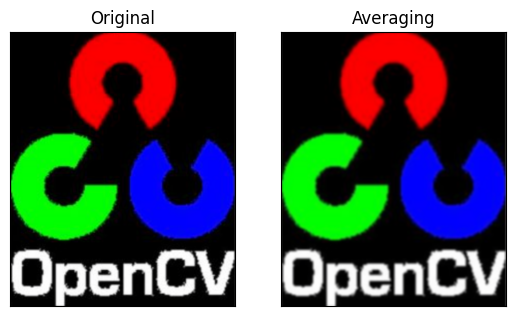

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

img = cv.imread('Images/opencv_logo.png')
assert img is not None, "Image not found"

kernel = np.ones((5, 5), np.float32) / 25 # 5x5 averaging kernel을 생성, 25는 kernel의 모든 원소의 합
dst = cv.filter2D(img, -1, kernel) # 2D convolution을 수행

plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(dst), plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

# Image Blurring(Image Smoothing)
Image blurring은 low pass filter를 사용ㅎ여 이미지를 blur 처리하는 것이다. noise를 제거하는데 유용하며, high frequency content(noise, edge)를 제거한다.

## 1. Averaging
이미지를 blur 처리하기 위해 kernel을 이미지에 적용하고, kernel의 모든 픽셀의 평균값을 취한다. cv.blur()) 또는 cv.boxFilter() 함수를 사용하여 kernel을 적용할 수 있다. 

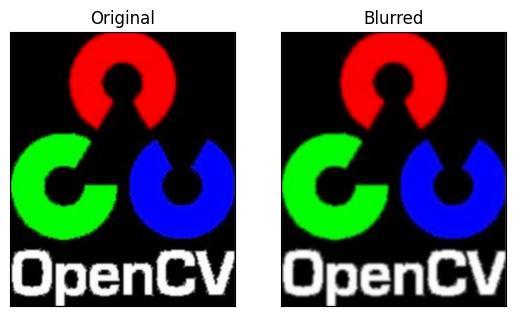

In [7]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('Images/opencv_logo.png')

blur = cv.blur(img, (5, 5)) # 5x5 averaging kernel을 사용하여 blur를 수행

plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(blur), plt.title('Blurred')
plt.xticks([]), plt.yticks([]) 
plt.show()

## 2. Gaussian Blurring
box filter 대신에 gaussian kernel을 사용하여 이미지를 blur 처리할 수 있다. cv.GaussianBlur() 함수를 사용하여 이미지를 blur 처리할 수 있다. kernel의 width, height를 지정해야 한다. kernel의 width, height가 커질수록 이미지가 더 많이 blur 처리된다.

Gaussianblur는 cv.Gaussian(img, (kenel_width, kernel_height), sigmaX) 함수를 사용하여 이미지를 blur 처리할 수 있다. sigmaX는 x축 방향으로의 gaussian kernel의 표준편차를 의미한다.

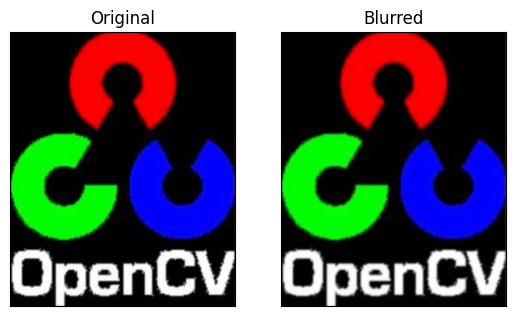

In [9]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('Images/opencv_logo.png')

blur = cv.GaussianBlur(img, (5, 5), 0) 

plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(blur), plt.title('Blurred')
plt.xticks([]), plt.yticks([]) 
plt.show()

## 3. Median Blurring
이미지의 각 픽셀을 kernel의 크기로 정렬하고, 중간값을 취한다. cv.medianBlur() 함수를 사용하여 이미지를 blur 처리할 수 있다. 이 방법은 salt-and-pepper noise를 제거하는데 효과적이다.
cv.medianBlur(img, kernel_size)

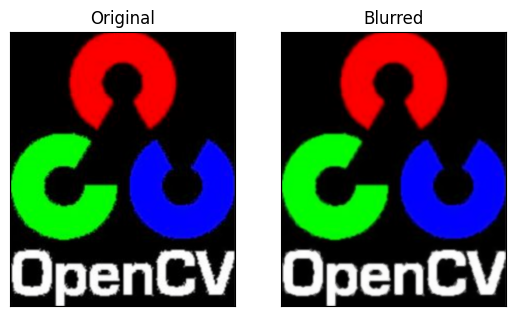

In [10]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('Images/opencv_logo.png')

blur = cv.medianBlur(img, 5) 

plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(blur), plt.title('Blurred')
plt.xticks([]), plt.yticks([]) 
plt.show()

## 4. Bilateral Filtering
cv.bilateralFilter() 함수를 사용하여 이미지를 blur 처리할 수 있다. 이 방법은 edge를 유지하면서 noise를 제거하는데 효과적이다. 다른 filter보다 느리다는 단점이 있다. cv.bilateralFilter(img, d, sigmaColor, sigmaSpace) 함수를 사용하여 이미지를 blur 처리할 수 있다. d는 pixel의 neighborhood를 정의하는데 사용되는 지름을 의미한다. sigmaColor는 색상 공간에서의 filter의 표준편차를 의미하며, sigmaSpace는 좌표 공간에서의 filter의 표준편차를 의미한다.

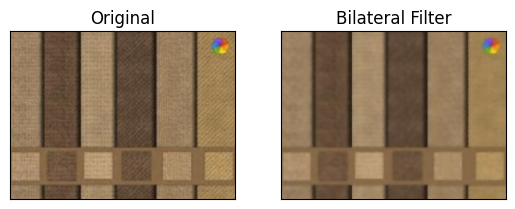

In [17]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('Images/bilater.png')

blur = cv.bilateralFilter(img, 9, 75, 75)

plt.subplot(121), plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv.cvtColor(blur, cv.COLOR_BGR2RGB)), plt.title('Bilateral Filter')
plt.xticks([]), plt.yticks([])
plt.show()